## 2. Training Models (Random Forest, Extra Tree) with Oversampling

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../preprocessed/clean_survey.csv", index_col=False)
df

,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_130_NSW,q_130_NT,q_130_QLD,q_130_SA,q_130_TAS,q_130_VIC,q_130_WA,invol_score,q_031_adjusted,involvement_level
0,1.00,2,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,Low
1,0.89,2,0,0,0,1,0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,Low
2,0.86,1,1,1,0,0,0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,Medium
3,0.85,2,0,1,0,1,0,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,Medium
4,0.71,1,0,1,0,1,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.62,1,1,0,1,0,0,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Low
871,1.00,0,1,1,1,1,1,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,Low
872,1.00,2,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,Low
873,1.00,3,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Low


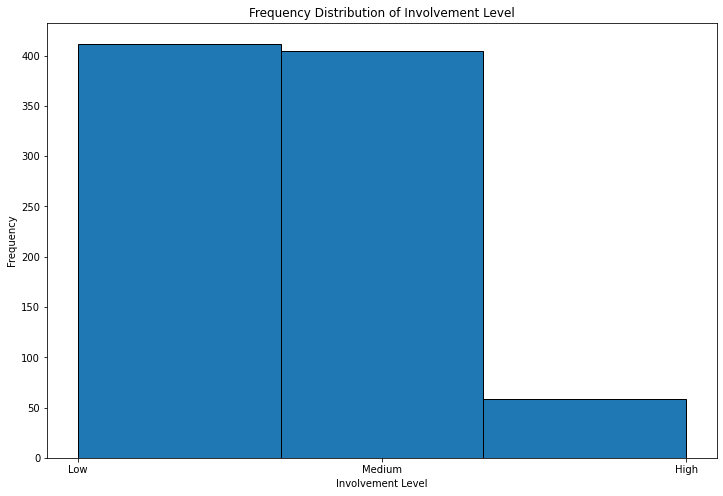

In [3]:
plt.figure(figsize=(12, 8))
df["involvement_level"].hist(bins=3, edgecolor='black')
plt.title('Frequency Distribution of Involvement Level')
plt.xlabel('Involvement Level')
plt.ylabel('Frequency')
plt.grid(False)  # Optionally turn off the grid if preferred
plt.show()

We can clearly see the imbalanced label distribution, where 'High' involvement has very few data instances. Thus, we oversample the dataset so that the labels are more balanced

### 2.1 Oversample Dataset
From above we can clearly see the imbalanced label distribution, where 'High' involvement has very few data instances. Thus, we oversample the dataset so that the labels are more balanced

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# split to indenpendent and dependent variables
# drop all variables computing the labels
X = df.drop(['q_031_adjusted', 'invol_score', 'q_031', 'involvement_level'] + [f'q_0{i}' for i in range(45, 55)], axis=1)
y = df["involvement_level"]

# Split the dataset into training and test sets
X_train_imb, X_test, y_train_imb, y_test = train_test_split(X, y, random_state=42)


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_imb, y_train_imb)



In [5]:
# inspect the oversampled sets
print(y_train.value_counts())
X_train

Medium    313
High      313
Low       313
Name: involvement_level, dtype: int64


,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_125_none,q_125_other,q_130_ACT,q_130_NSW,q_130_NT,q_130_QLD,q_130_SA,q_130_TAS,q_130_VIC,q_130_WA
0,0.790000,3,0,0,0,0,1,0,0,5,...,0.0,0.0,0.0,0.000000,0.00000,1.000000,0.0,0.0,0.000000,0.000000
1,0.640000,2,1,0,0,0,0,1,1,3,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,1.0,0.0,0.000000,0.000000
2,1.000000,2,0,1,1,1,1,1,0,5,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,1.000000,0.000000
3,0.870000,2,0,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,1.000000,0.000000
4,0.510000,3,0,0,0,0,0,0,1,5,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,0.701805,2,0,1,0,0,0,0,0,3,...,0.0,0.0,0.0,0.000000,0.03009,0.000000,0.0,0.0,0.969910,0.000000
935,0.724866,1,1,1,0,0,0,0,0,4,...,0.0,0.0,0.0,0.167557,0.00000,0.832443,0.0,0.0,0.000000,0.000000
936,0.833902,2,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,0.000000,0.00000,0.212339,0.0,0.0,0.787661,0.000000
937,0.580907,1,0,0,0,0,1,0,0,3,...,0.0,0.0,0.0,0.181825,0.00000,0.000000,0.0,0.0,0.000000,0.818175


### 2.2 Automated Machine Learning

In this section, the models selected only serve as a rough sketch of what models to perform the classifications

In [6]:
import autosklearn.classification as autosklearn_clf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Auto-sklearn classifier
automl = autosklearn_clf.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30)

# Fit the model
automl.fit(X_train, y_train)
print(automl.leaderboard())



          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
12           1             0.26          extra_trees  0.187097   2.244483
4            2             0.04        random_forest  0.200000   1.898121
2            3             0.02        random_forest  0.206452   1.571911
14           4             0.08        random_forest  0.206452   1.773198
8            5             0.02                  lda  0.209677  24.373810
9            6             0.10        random_forest  0.216129   1.741524
24           7             0.12        random_forest  0.225806   1.837265
23           8             0.02                  mlp  0.241935   1.592098
26           9             0.04        random_forest  0.241935   1.892692
6           10             0.08        random_forest  0.264516   1.654096
11          11             0.08  k_nearest_neighbors  0.335484   1.101950
7           12             0.10  k_nea

As we can see, the models weighted highest are random_forest and extra_trees. So we will fine tune the hyperparameters of these two classifiers, using Grid Search and Baysian Optimisation

In [7]:
from pprint import pprint
# Evaluate the model
y_pred = automl.predict(X_test)
y_train_pred = automl.predict(X_train)
print("Training Accuracy", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy", accuracy_score(y_test, y_pred))
print()

# Print the best model
pprint(automl.show_models(), indent = 4)

Training Accuracy 0.9478168264110756
Testing Accuracy 0.6621004566210046

{   2: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f4dfb780fd0>,
           'cost': 0.20645161290322578,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f4dfb8fcc70>,
           'ensemble_weight': 0.02,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f4dfb780f10>,
           'model_id': 2,
           'rank': 1,
           'sklearn_classifier': RandomForestClassifier(max_features=9, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
    4: {   'balancing': Balancing(random_state=1, strategy='weighting'),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f4dfb741820>,
         

### 2.3 Hyperparameter Tunning with Cross Validation (Random Forest)

We introduce `oversampling` in the `cross-validation` process to give a more intact evaluation of model performance.

#### a). Using Grid Search

### Random Forest

In [8]:
from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [9]:
# Create an imblearn pipeline that first applies SMOTE and then fits a RandomForestClassifier
pipeline_rf = ImblearnPipeline([
    ('smote', SMOTE(random_state=42)),  # Oversampling step
    ('rf', RandomForestClassifier())  # Classifier step
])

# Define the parameter grid, note that we now prefix parameters belonging to the steps of the pipeline
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['log2', 'sqrt', 20, 30]
}

# Create a GridSearchCV object, using Imblearn's version which is compatible with their pipeline
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit the model - X and y should be the entire dataset if not holding out a test set
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[CV] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.3s
[CV] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.3s
[CV] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.3s
[CV] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.3s
[CV] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.3s
[CV] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.6s
[CV] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.6s
[CV] END rf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__max_features': ['log2', 'sqrt', 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200, 300]},
             scoring='f1_weighted', verbose=2)

In [10]:
# Best hyperparameters and best cross-validated testing accuracy
print("Random Forest Best Hyperparameters are ", grid_search_rf.best_params_)
print("Random Forest Best Testing F1 Weighted is ", grid_search_rf.best_score_)
best_params_grid_rf = grid_search_rf.best_params_
model1 = grid_search_rf.best_estimator_

Random Forest Best Hyperparameters are  {'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Random Forest Best Testing F1 Weighted is  0.6006737249613872


### Extra Tree

In [11]:
# Create an imblearn pipeline that first applies SMOTE and then fits an ExtraTreesClassifier
pipeline_et = ImblearnPipeline([
    ('smote', SMOTE(random_state=42)),  # Oversampling step
    ('et', ExtraTreesClassifier(random_state=42))  # Classifier step
])

# Define the parameter grid for the ExtraTreesClassifier
param_grid_et = {
    'et__n_estimators': [100, 300, 500],  # More aggressive for ExtraTrees due to increased randomness
    'et__max_depth': [None, 10, 20, 30],
    'et__min_samples_split': [2, 5, 10],
    'et__min_samples_leaf': [1, 2, 4],  # Slightly adjusted
    'et__max_features': ['log2', 'sqrt', 20, 30]
}

# Create a GridSearchCV object
grid_search_et = GridSearchCV(estimator=pipeline_et, param_grid=param_grid_et, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit the model - X and y should be the entire dataset if not holding out a test set
grid_search_et.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[CV] END et__max_depth=None, et__max_features=log2, et__min_samples_leaf=1, et__min_samples_split=2, et__n_estimators=100; total time=   0.5s
[CV] END et__max_depth=None, et__max_features=log2, et__min_samples_leaf=1, et__min_samples_split=2, et__n_estimators=100; total time=   0.5s
[CV] END et__max_depth=None, et__max_features=log2, et__min_samples_leaf=1, et__min_samples_split=2, et__n_estimators=100; total time=   0.6s
[CV] END et__max_depth=None, et__max_features=log2, et__min_samples_leaf=1, et__min_samples_split=2, et__n_estimators=100; total time=   0.6s
[CV] END et__max_depth=None, et__max_features=log2, et__min_samples_leaf=1, et__min_samples_split=2, et__n_estimators=100; total time=   0.6s
[CV] END et__max_depth=None, et__max_features=log2, et__min_samples_leaf=1, et__min_samples_split=5, et__n_estimators=100; total time=   0.5s[CV] END et__max_depth=None, et__max_features=log2, et__min_samples_leaf=1, et__min_samples_split=5, et__n_estimators=100; total time=   0.5s

[CV] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('et',
                                        ExtraTreesClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'et__max_depth': [None, 10, 20, 30],
                         'et__max_features': ['log2', 'sqrt', 20, 30],
                         'et__min_samples_leaf': [1, 2, 4],
                         'et__min_samples_split': [2, 5, 10],
                         'et__n_estimators': [100, 300, 500]},
             scoring='f1_weighted', verbose=2)

In [12]:
# Best hyperparameters and best cross-validated testing accuracy
print("Extra Tree Best Hyperparameters are ", grid_search_et.best_params_)
print("Extra Tree Best Testing F1 Weighted is ", grid_search_et.best_score_)
best_params_grid_et = grid_search_et.best_params_
model2 = grid_search_et.best_estimator_

Extra Tree Best Hyperparameters are  {'et__max_depth': None, 'et__max_features': 20, 'et__min_samples_leaf': 1, 'et__min_samples_split': 5, 'et__n_estimators': 300}
Extra Tree Best Testing F1 Weighted is  0.595300115575476


### b) Using Baysian Optimisation

### Random Forest

In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
import numpy as np

In [14]:
# Define a pipeline that combines SMOTE with a RandomForestClassifier
# Create an imblearn pipeline that first applies SMOTE and then fits a RandomForestClassifier
pipeline_rf = ImblearnPipeline([
    ('smote', SMOTE(random_state=42)),  # Oversampling step
    ('rf', RandomForestClassifier())  # Classifier step
])

# Define the search space for hyperparameters
# Note: Adjust these ranges and options based on your dataset and prior knowledge if available
search_spaces_rf = {
    'rf__n_estimators': Integer(100, 300),
    'rf__max_depth': Integer(5, 50),
    'rf__min_samples_split': Integer(2, 10),
    'rf__min_samples_leaf': Integer(1, 5),
    'rf__max_features': Categorical(['sqrt', 'log2', 30])
}

# Initialize BayesSearchCV
bayes_search_rf = BayesSearchCV(
    estimator=pipeline_rf,
    search_spaces=search_spaces_rf,
    n_iter=30,  # Number of parameter settings sampled. Adjust based on computational budget
    scoring='f1_weighted',  # or use 'balanced_accuracy' for imbalanced datasets
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    refit=True,
    random_state=42
)

# Execute the search
bayes_search_rf.fit(X_train, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                        ('rf', RandomForestClassifier())]),
              n_iter=30, n_jobs=-1, random_state=42, scoring='f1_weighted',
              search_spaces={'rf__max_depth': Integer(low=5, high=50, prior='uniform', transform='normalize'),
                             'rf__max_features': Categorical(categories=('sqrt', 'log2', 30), prior=None),
                             'rf__min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'rf__min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'rf__n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')})

In [15]:
print("Random Forest Best Hyperparameters are", bayes_search_rf.best_params_)
print("Random Forest Best Testing F1 Weighted is", bayes_search_rf.best_score_)
best_params_bayes_rf = bayes_search_rf.best_params_

Random Forest Best Hyperparameters are OrderedDict([('rf__max_depth', 38), ('rf__max_features', 'log2'), ('rf__min_samples_leaf', 1), ('rf__min_samples_split', 4), ('rf__n_estimators', 291)])
Random Forest Best Testing F1 Weighted is 0.6892830192788721


### Extra Tree

In [16]:
pipeline_et = ImblearnPipeline([
    ('smote', SMOTE(random_state=42)),  # Oversampling step
    ('et', ExtraTreesClassifier(random_state=42))  # Classifier step, now using ExtraTrees
])

# Define the search space for hyperparameters of ExtraTreesClassifier
search_spaces_et = {
    'et__n_estimators': Integer(100, 300),
    'et__max_depth': Integer(5, 50),
    'et__min_samples_split': Integer(2, 10),
    'et__min_samples_leaf': Integer(1, 5),
    'et__max_features': Categorical(['sqrt', 'log2', 30])
}

# Initialize BayesSearchCV with the adjusted pipeline and search spaces
bayes_search_et = BayesSearchCV(
    estimator=pipeline_et,
    search_spaces=search_spaces_et,
    n_iter=30,  # Number of parameter settings sampled. Adjust based on computational budget
    scoring='f1_weighted',  # or 'balanced_accuracy' for imbalanced datasets
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    refit=True,
    random_state=42
)

# Execute the search
bayes_search_et.fit(X_train, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                        ('et',
                                         ExtraTreesClassifier(random_state=42))]),
              n_iter=30, n_jobs=-1, random_state=42, scoring='f1_weighted',
              search_spaces={'et__max_depth': Integer(low=5, high=50, prior='uniform', transform='normalize'),
                             'et__max_features': Categorical(categories=('sqrt', 'log2', 30), prior=None),
                             'et__min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'et__min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'et__n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')})

In [17]:
print("Extra Tree Best Hyperparameters are", bayes_search_et.best_params_)
print("Extra Tree Best Testing F1 Weighted is", bayes_search_et.best_score_)
best_params_bayes_et = bayes_search_et.best_params_

Extra Tree Best Hyperparameters are OrderedDict([('et__max_depth', 25), ('et__max_features', 30), ('et__min_samples_leaf', 1), ('et__min_samples_split', 5), ('et__n_estimators', 138)])
Extra Tree Best Testing F1 Weighted is 0.6929532971784502


In [18]:
# Split the dataset into training and test sets
# WITHOUT OVERSAMPLING to reflect real world scenario
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# tunned by grid search, Random Forest 'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 300
model1 = grid_search_rf.best_estimator_

# tunned by grid search, Extra Tree 'et__max_depth': None, 'et__max_features': 'log2', 'et__min_samples_leaf': 1, 'et__min_samples_split': 10, 'et__n_estimators': 300
model2 = grid_search_et.best_estimator_

# tunned by bayesian optimisation, Random Forest ('rf__max_depth', 39), ('rf__max_features', 'log2'), ('rf__min_samples_leaf', 1), ('rf__min_samples_split', 2), ('rf__n_estimators', 300)
model3 = bayes_search_rf.best_estimator_

# tunned by bayesian optimisation, Extra Tree ('et__max_depth', 50), ('et__max_features', 'sqrt'), ('et__min_samples_leaf', 2), ('et__min_samples_split', 5), ('et__n_estimators', 140)
model4 = bayes_search_et.best_estimator_

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('et',
                 ExtraTreesClassifier(max_depth=25, max_features=30,
                                      min_samples_split=5, n_estimators=138,
                                      random_state=42))])

**NOTE:** Testing set uses the split (random state 42) set from the start as a demonstration

In [20]:
class_distribution = y_test.value_counts()
print(class_distribution)

Medium    102
Low        99
High       18
Name: involvement_level, dtype: int64


In [21]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, roc_auc_score

models = [model1, model2, model3, model4]
for i, model in enumerate(models, start=1):
    print(f"------------------------Model {i}---------------------------------------")
    y_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    
    
    # Calculating various metrics
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("Subset Accuracy:", accuracy_score(y_test, y_pred))

    # Micro-average
    print("F1 Score (Micro):", f1_score(y_test, y_pred, average='micro'))
    # Macro-average
    print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
    # Weighted-average
    print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))

    # ROC-AUC
    # Note: roc_auc_score expects a shape of (n_samples,) for binary problems and
    # (n_samples, n_classes) for multi-class/multi-label with one-hot encoding.
    # ROC-AUC calculation needs probabilistic predictions `y_proba`
    # use macro since class labels are imbalanced
    roc_auc = roc_auc_score(y_test, y_proba, average='macro', multi_class='ovr')
    print("ROC-AUC (Macro):", roc_auc)


------------------------Model 1---------------------------------------
Hamming Loss: 0.3059360730593607
Subset Accuracy: 0.6940639269406392
F1 Score (Micro): 0.6940639269406392
F1 Score (Macro): 0.5137049354154618
F1 Score (Weighted): 0.668131670060293
ROC-AUC (Macro): 0.7907562792403295
------------------------Model 2---------------------------------------
Hamming Loss: 0.3150684931506849
Subset Accuracy: 0.684931506849315
F1 Score (Micro): 0.684931506849315
F1 Score (Macro): 0.4759707629054362
F1 Score (Weighted): 0.6558308353723787
ROC-AUC (Macro): 0.8039965589424178
------------------------Model 3---------------------------------------
Hamming Loss: 0.3378995433789954
Subset Accuracy: 0.6621004566210046
F1 Score (Micro): 0.6621004566210046
F1 Score (Macro): 0.4611198997332844
F1 Score (Weighted): 0.6355810116766711
ROC-AUC (Macro): 0.7884145231306484
------------------------Model 4---------------------------------------
Hamming Loss: 0.2968036529680365
Subset Accuracy: 0.7031963470

**Comments:** In multi-class case, a high overall accuracy might hide poor performance on minor classes, especially for imbalanced datasets. In our example, Model 1 seems to have the highest accuracy but loweset ROC-AUC score. This might be because it only predicts the major class well.  

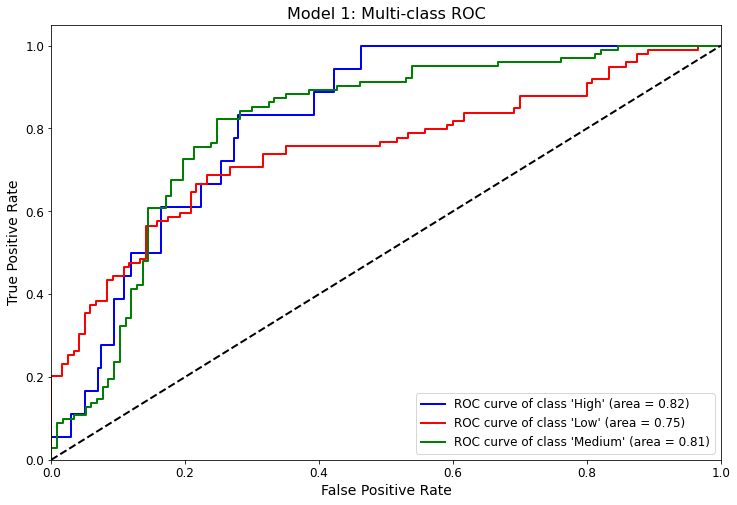

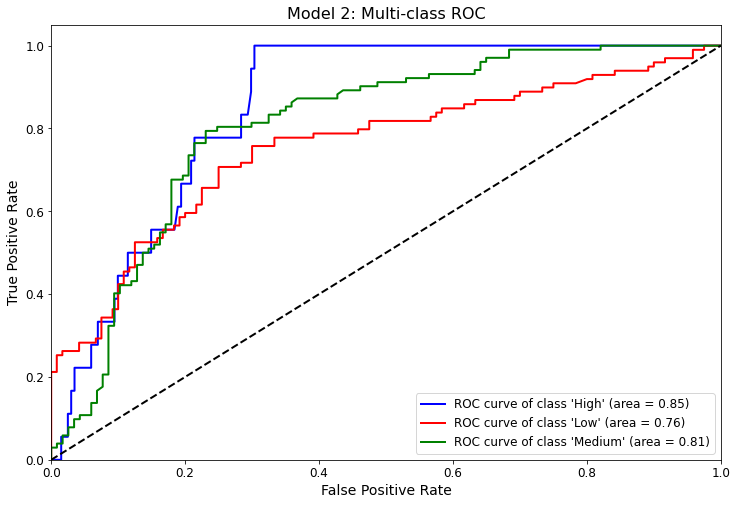

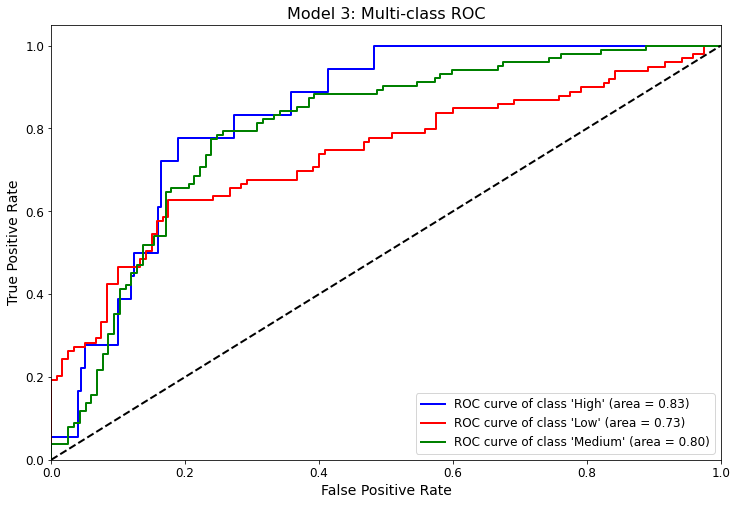

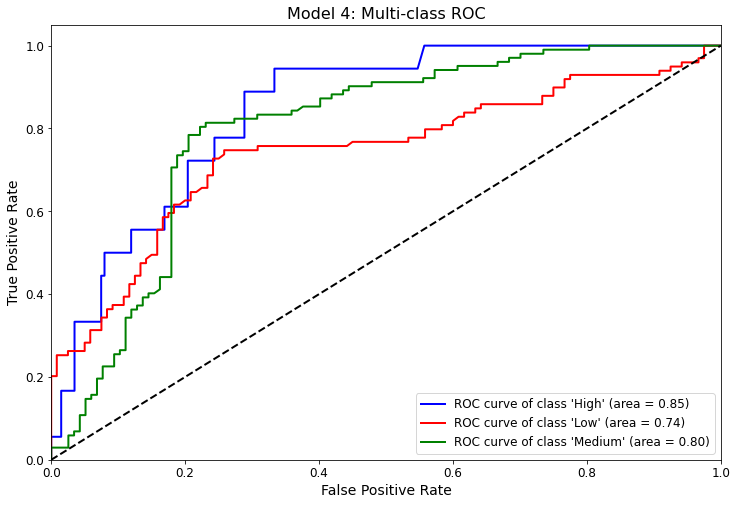

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels for multi-class ROC curve plotting
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]
# Colors for different classes
colors = cycle(['blue', 'red', 'green'])

for i, model in enumerate(models, start=1):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_proba = model.predict_proba(X_test)
    all_classes = model.classes_
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    
    # Plot ROC curve for each class
    plt.figure(figsize=(12, 8))
    for j, color in zip(range(n_classes), colors):
        plt.plot(fpr[j], tpr[j], color=color, lw=2,
                 label="ROC curve of class '{0}' (area = {1:0.2f})".format(all_classes[j], roc_auc[j]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'Model {i}: Multi-class ROC', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

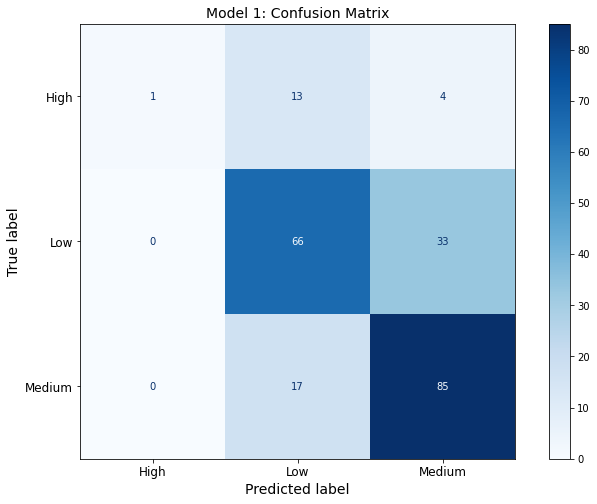

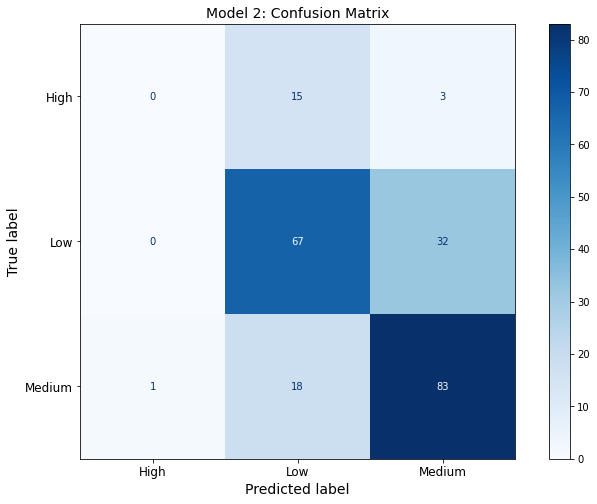

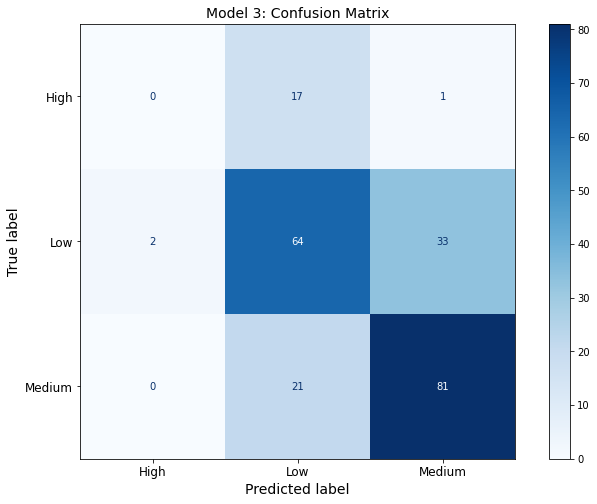

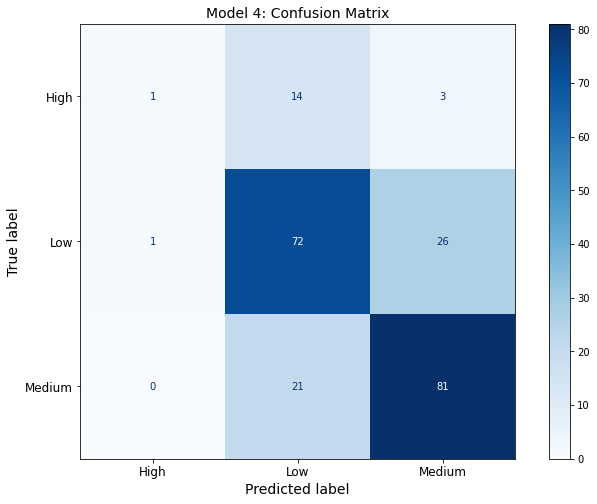

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for i, model in enumerate(models, start=1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    # Create a new figure or adjust the current figure size here
    fig, ax = plt.subplots(figsize=(12, 8))
    # Increase text font size within the matrix
    disp.plot(ax=ax, cmap=plt.cm.Blues)  # Plot on the specified axes to control the size
    
    # Now adjust the fontsize using ax properties
    ax.set_title(f'Model {i}: Confusion Matrix', fontsize=14)  # Adjust title fontsize
    ax.set_xlabel('Predicted label', fontsize=14)  # Adjust x-axis label fontsize
    ax.set_ylabel('True label', fontsize=14)  # Adjust y-axis label fontsize
    ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick fontsize for both axes
    
    plt.show()